In [1]:
from pathlib import Path
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.utils.data as data
from torchvision import transforms

from PIL import Image
from tqdm import tqdm

from utils import locate_data
import os

In [2]:
image_transforms = ["flip",
                    "crop",
                    "perspective",
                    "jitter"]

In [2]:
data_path = Path("data/CamVid")

In [4]:
print("crop")
images_crop = np.concatenate((np.load(data_path / "train.npy"),np.load(data_path / "train_crop.npy")))
print("saving")
np.save(data_path / "train_crop.npy", images_crop)

crop
saving


In [7]:
images_flip = np.load(data_path / "train_flip.npy")

In [8]:
images_flip.shape

(738, 3, 720, 960)

In [3]:
images_crop = np.load(data_path / "train_crop.npy")

In [15]:
masks_crop = np.load(data_path / "train_labels_crop.npy")

In [4]:
images_crop[600]

array([[[-0.9362959 , -1.0390445 , -1.2445416 , ...,  0.9131775 ,
          1.015926  ,  1.0673003 ],
        [-0.91917115, -1.0219197 , -1.1931673 , ...,  1.1015497 ,
          1.2042983 ,  1.2556726 ],
        [-0.88492167, -0.9705454 , -1.1075436 , ...,  1.4440448 ,
          1.5810429 ,  1.6324171 ],
        ...,
        [-1.4500387 , -1.4500387 , -1.4500387 , ..., -1.4500387 ,
         -1.4842881 , -1.5014129 ],
        [-1.4500387 , -1.4500387 , -1.4671633 , ..., -1.4329139 ,
         -1.4671633 , -1.4671633 ],
        [-1.4500387 , -1.4671633 , -1.4671633 , ..., -1.4157891 ,
         -1.4500387 , -1.4500387 ]],

       [[-0.84523803, -0.9502801 , -1.160364  , ...,  1.6407562 ,
          1.7457983 ,  1.7983193 ],
        [-0.84523803, -0.93277305, -1.107843  , ...,  1.8158263 ,
          1.9033613 ,  1.9558823 ],
        [-0.810224  , -0.880252  , -1.0203081 , ...,  2.1659663 ,
          2.2184873 ,  2.2710083 ],
        ...,
        [-1.3354341 , -1.352941  , -1.352941  , ..., -

In [5]:
toimage = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage()])

In [12]:
len(images_crop)/2

369.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


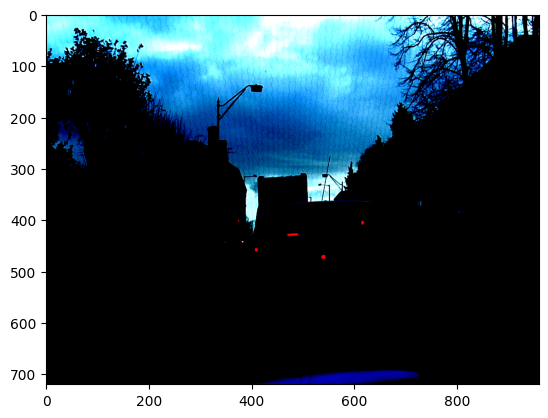

In [13]:
plt.imshow(torch.tensor(images_crop[0]).permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


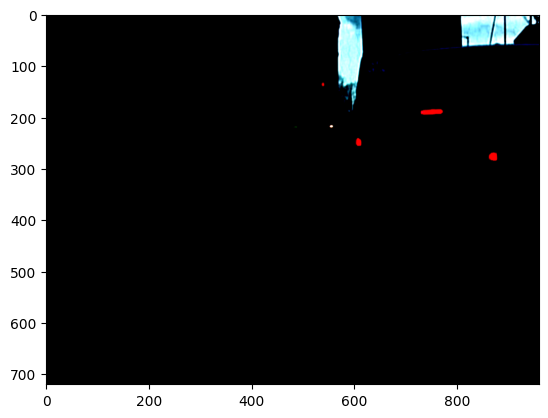

In [14]:
plt.imshow(torch.tensor(images_crop[369]).permute(1,2,0).numpy())

In [6]:
toimage(images_crop[600])

ValueError: pic should not have > 4 channels. Got 960 channels.

In [6]:
images_crop.shape

(738, 3, 720, 960)

In [3]:
image_paths = sorted((data_path / "train_jitter").glob("*"))
mask_paths = sorted((data_path / "train_labels_perspective").glob("*"))

In [4]:
data_transforms = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )

In [5]:
images = np.array([data_transforms(Image.open(i)).numpy() for i in tqdm(image_paths)])

100%|██████████| 369/369 [00:22<00:00, 16.18it/s]


In [6]:
np.save(data_path / "train_jitter.npy", images)

In [4]:
class_labels = pd.read_csv(Path("data/CamVid") / "class_dict.csv")

In [5]:
def adjust_mask(mask: np.array, class_labels: pd.DataFrame) -> torch.Tensor:
        """Adjust mask to be in range 0-11"""
        label_dict = class_labels.iloc[:, 1:].to_dict(orient='index')
        label_dict ={ k: list(v.values()) for k, v in label_dict.items()}
        segmentation_map_list = []
        for x,color in enumerate(label_dict.values()):
            segmentation_map = (mask==color).all(axis=-1)
            segmentation_map=(segmentation_map*1)
            segmentation_map*=x
            segmentation_map_list.append(segmentation_map)

        return np.amax(np.stack(segmentation_map_list,axis=-1),axis=-1)

In [6]:
masks = np.array([adjust_mask(np.array(Image.open(i), dtype=np.uint8), class_labels=class_labels)for i in tqdm(mask_paths)])

100%|██████████| 369/369 [05:02<00:00,  1.22it/s]


In [ ]:
images_crop =

In [6]:
np.save(data_path / "train_labels_all.npy", masks_all)

In [6]:
images_flip_crop = np.concatenate((np.load(data_path / "train_flip.npy"),np.load(data_path / "train_crop.npy")))

In [5]:
images_flip_crop_perspective = np.concatenate((images_flip_crop,np.load(data_path / "train_perspective.npy")))

NameError: name 'images_flip_crop' is not defined

In [5]:
images_all = np.concatenate((images_flip_crop_perspective ,np.load(data_path / "train_jitter.npy")))

: 

: 

In [3]:
masks_flip_crop = np.concatenate((np.load(data_path / "train_labels_flip.npy"),np.load(data_path / "train_labels_crop.npy")))

In [4]:
masks_flip_crop_perspective = np.concatenate((masks_flip_crop,np.load(data_path / "train_labels_perspective.npy")))

In [5]:
masks_all = np.concatenate((masks_flip_crop_perspective,np.load(data_path / "train_labels_jitter.npy")))

(738, 3, 720, 960)

In [5]:
images = np.load(data_path / "train.npy")

In [9]:
len(images)

369

In [16]:
torch.tensor(images[0])

tensor([[[ 0.5022,  0.5022,  0.4337,  ..., -1.6555, -1.6727, -1.7069],
         [ 0.4337,  0.5022,  0.4679,  ..., -1.6555, -1.6727, -1.7069],
         [ 0.5364,  0.5707,  0.5364,  ..., -1.6555, -1.6727, -1.7069],
         ...,
         [-1.8268, -1.8610, -1.8953,  ..., -1.6727, -1.6727, -1.7069],
         [-1.8610, -1.8782, -1.9124,  ..., -1.6898, -1.6555, -1.6898],
         [-1.8782, -1.9295, -1.9295,  ..., -1.7412, -1.7240, -1.7583]],

        [[ 1.0980,  1.0980,  1.0455,  ..., -1.4930, -1.5630, -1.5980],
         [ 1.0280,  1.0980,  1.0805,  ..., -1.4930, -1.5630, -1.5980],
         [ 1.1331,  1.1681,  1.1681,  ..., -1.4930, -1.5630, -1.5980],
         ...,
         [-1.7381, -1.7731, -1.8081,  ..., -1.4055, -1.4405, -1.4755],
         [-1.7556, -1.7731, -1.8081,  ..., -1.4230, -1.4230, -1.4580],
         [-1.7731, -1.8256, -1.8256,  ..., -1.4755, -1.4930, -1.5280]],

        [[ 1.4374,  1.4374,  1.4200,  ..., -1.3164, -1.3687, -1.4036],
         [ 1.3677,  1.4374,  1.4548,  ..., -1

In [6]:
torch.cuda.is_available()

True

In [7]:
for t in image_transforms:
    os.mkdir(data_path / ("train_"+ t))
    os.mkdir(data_path / ("train_labels_"+ t))

FileExistsError: [Errno 17] File exists: 'data/CamVid/train_flip'

In [10]:
flip_transform = transforms.RandomHorizontalFlip(p=1)
crop_transform = transforms.Compose([
            transforms.RandomCrop(size=(360, 480)),
            transforms.Resize(size=(720, 960))
        ])
perspective_transform = transforms.Compose([
            transforms.RandomPerspective(distortion_scale=0.5, p=1),
            transforms.CenterCrop(size=(360, 480)),
            transforms.Resize(size=(720, 960))
        ])
jitter_transform = transforms.ColorJitter(brightness=(1.2,2),hue=(-0.5,0.5))

tensor_transform = transforms.ToTensor()




flip_images = list()
crop_images = list()
perspective_images = list()
jitter_images = list()

flip_masks = list()
crop_masks = list()
perspective_masks = list()
jitter_masks = list()



for i in tqdm(range(len(image_paths))):
    image_path = image_paths[i]
    mask_path = mask_paths[i]

    with open(image_path, "rb") as image_file, open(mask_path, "rb") as mask_file:
        image = Image.open(image_file)
        mask = Image.open(mask_file)

        image = tensor_transform(image)
        mask =  tensor_transform(mask)


        # flip_images.append(flip_transform(image))
        # flip_masks.append(flip_transform(mask))

        crop_images.append(crop_transform(image))
        crop_masks.append(crop_transform(mask))

        perspective_images.append(perspective_transform(image))
        perspective_masks.append(perspective_transform(mask))

        # jitter_images.append(jitter_transform(image))
        # jitter_masks.append(jitter_transform(mask))
        
        

  0%|          | 0/369 [00:00<?, ?it/s]/home/caspe/anaconda3/envs/image/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|██████████| 369/369 [01:25<00:00,  4.32it/s]


In [12]:
crop_images

[tensor([[[0.0471, 0.0471, 0.0471,  ..., 0.7853, 0.7324, 0.7059],
          [0.0471, 0.0471, 0.0471,  ..., 0.7745, 0.7431, 0.7275],
          [0.0471, 0.0471, 0.0471,  ..., 0.7529, 0.7647, 0.7706],
          ...,
          [0.1108, 0.1105, 0.1100,  ..., 0.0583, 0.0613, 0.0627],
          [0.1127, 0.1120, 0.1105,  ..., 0.0868, 0.0917, 0.0941],
          [0.1137, 0.1127, 0.1108,  ..., 0.1010, 0.1069, 0.1098]],
 
         [[0.0471, 0.0471, 0.0471,  ..., 0.8314, 0.7765, 0.7490],
          [0.0471, 0.0471, 0.0471,  ..., 0.8206, 0.7873, 0.7706],
          [0.0471, 0.0471, 0.0471,  ..., 0.7990, 0.8088, 0.8137],
          ...,
          [0.1147, 0.1145, 0.1140,  ..., 0.1044, 0.1074, 0.1088],
          [0.1167, 0.1159, 0.1145,  ..., 0.1466, 0.1515, 0.1539],
          [0.1176, 0.1167, 0.1147,  ..., 0.1676, 0.1735, 0.1765]],
 
         [[0.0471, 0.0471, 0.0471,  ..., 0.7931, 0.7480, 0.7255],
          [0.0471, 0.0471, 0.0471,  ..., 0.7824, 0.7588, 0.7471],
          [0.0471, 0.0471, 0.0471,  ...,

In [11]:
toimage = transforms.ToPILImage()

In [15]:
os.path.basename(image_paths[0])

'0001TP_009210.png'

In [13]:
for i in tqdm(range(len(image_paths))):


    image_name = os.path.basename(image_paths[i])
    mask_name = os.path.basename(mask_paths[i])

    #toimage(flip_images[i]).save(data_path /("train_flip/"+ image_name))
    #toimage(flip_masks[i]).save(data_path /("train_labels_flip/"+ mask_name))
    toimage(crop_images[i]).save(data_path /("train_crop/"+ image_name))
    toimage(crop_masks[i]).save(data_path /("train_labels_crop/"+ mask_name))
    toimage(perspective_images[i]).save(data_path /("train_perspective/"+ image_name))
    toimage(perspective_masks[i]).save(data_path /("train_labels_perspective/"+ mask_name))
    #toimage(jitter_images[i]).save(data_path /("train_jitter/"+ image_name))
    #toimage(jitter_masks[i]).save(data_path /("train_labels_jitter/"+ mask_name))


100%|██████████| 369/369 [02:32<00:00,  2.42it/s]


In [17]:
data_path /("train_flip/"+ os.path.basename(image_paths[0]))

PosixPath('data/CamVid/train_flip/0001TP_009210.png')

In [19]:
from segmentationData import SegmentationDataset

In [27]:
transformations = transforms.Compose(
                              [
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                            ]
                            )


dataset = SegmentationDataset(Path("data/CamVid"),
                              transforms=transformations,
                              image_folder="train",
                              mask_folder="train_labels",
                              augments=["crop"]
                             )

In [25]:
for 

['1', '1']

In [26]:
[i for i in list()]

[]